In [1]:
# Import the important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now we will create path variable for loading the data 

In [6]:
#load the data 
path = r"D:/test_set/Test project [data analyst].csv"
df = pd.read_csv(path)

we have save the dataframe (df) now we will check few rows and columns of the data to get an idea how data looks like 

In [7]:
#check the few rows of dataframe
df.head(3)

,Tracking Number,Carrier Name,Service Level,Zones,Weight (lbs),Dimensions (in),Charge Type,Charge,Pickup Zipcode,Dropoff Zipcode,Date of Delivery
0,1Z1234567890123458,UPS,Ground,Zone 6,11,12x12x8,Adult Signature Required,11.25,10005,90001,2023-10-25
1,1Z1234567890123451,FedEx,Ground,Zone 4,5,12x12x8,Additional Tax,5.5,60606,90210,2023-02-15
2,1Z1234567890123456,OSM,2Day,Zone 3,12,12x12x8,Adjustment,7.5,60601,90210,2023-07-10


Checking the datatypes or any null values present in the data, This is the Part where we start cleaning the data such as handling null values, checking for duplicates, standardizing column values

In [14]:
#checing for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tracking Number   214 non-null    object
 1   Carrier Name      214 non-null    object
 2   Service Level     214 non-null    object
 3   Zones             214 non-null    object
 4   Weight (lbs)      214 non-null    object
 5   Dimensions (in)   214 non-null    object
 6   Charge Type       214 non-null    object
 7   Charge            214 non-null    object
 8   Pickup Zipcode    214 non-null    int64 
 9   Dropoff Zipcode   214 non-null    int64 
 10  Date of Delivery  214 non-null    object
dtypes: int64(2), object(9)
memory usage: 18.5+ KB


In [50]:
#Checking if any duplicate is in Tracking id 
duplicate = df.duplicated(['Tracking Number'])
duplicate_check = df[duplicate]
duplicate_check

,Tracking Number,Carrier Name,Service Level,Zones,Weight (lbs),Dimensions (in),Charge Type,Charge,Pickup Zipcode,Dropoff Zipcode,Date of Delivery
207,2E76543LKJHG,Pandion,Ground,3,4 lbs,12x12x8,Future Day Pickup - Additional Handling - Week...,$25.00,30301,94101,2031-08-18
208,3F43210MNBVC,Maergo,Economy,2,4 lbs,12x12x8,Future Day Pickup - Additional Handling - Week...,$25.00,94105,10003,2031-09-30
209,4G10987ZXCVB,UPS,Standard,4,5 lbs,12x12x8,Future Day Pickup - Additional Handling - Week...,$30.00,75201,60605,2031-10-10


In [57]:
for items in duplicate_check["Tracking Number"]:
    all_items = df["Tracking Number"] == items
    print(df[all_items])

    Tracking Number Carrier Name Service Level Zones Weight (lbs)  \
77     2E76543LKJHG       OnTrac        Ground     2        4 lbs   
207    2E76543LKJHG      Pandion        Ground     3        4 lbs   

    Dimensions (in)                                        Charge Type  \
77          12x12x8                                     Declared Value   
207         12x12x8  Future Day Pickup - Additional Handling - Week...   

     Charge  Pickup Zipcode  Dropoff Zipcode Date of Delivery  
77   $25.00           85005            94102       2023-10-15  
207  $25.00           30301            94101       2031-08-18  
    Tracking Number Carrier Name Service Level Zones Weight (lbs)  \
78     3F43210MNBVC          GLS       Economy     5        4 lbs   
208    3F43210MNBVC       Maergo       Economy     2        4 lbs   

    Dimensions (in)                                        Charge Type  \
78          12x12x8                              Declared Value Charge   
208         12x12x8  

From the above information we can clearly see that the same parcel get picked by other carrier and have different charge, so we will not remove it.

In [68]:
#checking the name of the columns
column = df.columns
column

Index(['Tracking Number', 'Carrier Name', 'Service Level', 'Zones',
       'Weight (lbs)', 'Dimensions (in)', 'Charge Type', 'Charge',
       'Pickup Zipcode', 'Dropoff Zipcode', 'Date of Delivery'],
      dtype='object')

In [72]:
#now We will check for unique value in each column, I have already check the tracking ids now check the other columns
carrier = df['Carrier Name'].unique()
service = df['Service Level'].unique()
zones = df['Zones'].unique()    
weight = df['Weight (lbs)'].unique() 
dim = df['Dimensions (in)'].unique() 
charge_type = df['Charge Type'].unique()
charge = df['Charge'].unique()
pickup = df['Pickup Zipcode'].unique()
dropoff = df['Dropoff Zipcode'].unique()
    

In [73]:
carrier


array(['UPS', 'FedEx', 'OSM', 'GLS', 'BetterTrucks', 'DHL', 'Pandion',
       'OnTrac', 'Fedex', 'Maergo'], dtype=object)

FedEx and Fedex are same so we will replace it

In [88]:
#can see the value of FedEX and Fedex are same
df["Carrier Name"] = df["Carrier Name"].replace('Fedex', 'FedEx')
df["Carrier Name"].unique()

array(['UPS', 'FedEx', 'OSM', 'GLS', 'BetterTrucks', 'DHL', 'Pandion',
       'OnTrac', 'Maergo'], dtype=object)

In [89]:
service
#replacing the value of 2day to same day


array(['Ground', '2Day', 'Next Day Air', 'Standard', 'Express',
       'Priority', 'Economy', 'Expedited'], dtype=object)

In [99]:
df["Service Level"] = df["Service Level"].replace('2Day', 'Same day')
df['Service Level'].unique()

array(['Ground', 'Same day', 'Next Day Air', 'Standard', 'Express',
       'Priority', 'Economy', 'Expedited'], dtype=object)

In [106]:
zones
#non uniform data of Zone
df["Zones"] = df['Zones'].replace(('1','2','3','4','5') ,('Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5'))

In [107]:
df['Zones'].unique()

array(['Zone 6', 'Zone 4', 'Zone 3', 'Zone 1', 'Zone 2', 'Zone 5'],
      dtype=object)

In [108]:
#now We will check the weight of column
weight
#some values in lbs or some without lbs, since we know the weight column in lbs unit so will will remove the lbs unit from rows

array(['11', '5', '12', '7', '8', '6', '10', '9', '4', '4 lbs', '5 lbs',
       '6 lbs', '7 lbs', '8 lbs'], dtype=object)

In [109]:
df['Weight (lbs)'] = df['Weight (lbs)'].replace(('4 lbs', '5 lbs', '6 lbs', '7 lbs', '8 lbs'), ('4', '5', '6', '7', '8'))

In [119]:
#Changing the data type of the column 
df['Weight (lbs)'] =df['Weight (lbs)'].astype(int)


In [120]:
df['Weight (lbs)'].unique()

array([11,  5, 12,  7,  8,  6, 10,  9,  4])

In [111]:
dim
#No need to change anything in dimension column

array(['12x12x8', '10x10x6', '12x10x6', '14x14x10', '16x16x12', '12x8x6',
       '12x10x8', '14x12x10', '14x12x8'], dtype=object)

In [122]:
charge
#Again some values in $ some are without $ so we will make all the values without $

array(['11.25', '5.5', '7.5', '9', '10', '6.25', '7.25', '12.75', '8.75',
       '8.25', '11.5', '7.75', '10.75', '12', '6.5', '9.5', '$25.00',
       '$30.00', '$28.50', '$32.00', '$27.00', '$25.50', '$35.00',
       '$26.75', '$29.25', '$27.50', '$26.00'], dtype=object)

In [127]:
df['Charge'] = df['Charge'].replace(('$25.00',
       '$30.00', '$28.50', '$32.00', '$27.00', '$25.50', '$35.00',
       '$26.75', '$29.25', '$27.50', '$26.00'), ('25.00',
       '30.00', '28.50', '32.00', '27.00', '25.50', '35.00',
       '26.75', '29.25', '27.50', '26.00'))

In [128]:
df['Charge'].unique()

array(['11.25', '5.5', '7.5', '9', '10', '6.25', '7.25', '12.75', '8.75',
       '8.25', '11.5', '7.75', '10.75', '12', '6.5', '9.5', '25.00',
       '30.00', '28.50', '32.00', '27.00', '25.50', '35.00', '26.75',
       '29.25', '27.50', '26.00'], dtype=object)

In [129]:
df['Charge'] = df['Charge'].astype(float)

In [130]:
df['Charge'].unique()

array([11.25,  5.5 ,  7.5 ,  9.  , 10.  ,  6.25,  7.25, 12.75,  8.75,
        8.25, 11.5 ,  7.75, 10.75, 12.  ,  6.5 ,  9.5 , 25.  , 30.  ,
       28.5 , 32.  , 27.  , 25.5 , 35.  , 26.75, 29.25, 27.5 , 26.  ])

In [131]:
pickup

array([10005, 60606, 60601, 90001, 90002, 90210, 30303, 85001, 20001,
       90010, 75202, 60610, 30302, 85005, 94101, 20002, 60605, 10001,
       90005, 94102, 75201, 60602, 85002, 10010, 30301, 94105, 20003],
      dtype=int64)

In [132]:
dropoff

array([90001, 90210, 90002, 60606, 60601, 30303, 10005, 10001, 94102,
       75201, 30301, 60605, 80202, 20001, 94105, 10002, 20002, 90005,
       30305, 85002, 20003, 90010, 80201, 30302, 94101, 85005, 30304,
       10003, 85001, 60602], dtype=int64)

The values of pickup and dropoff column looks fine so we will skip this column and continue with our clean dataframe

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tracking Number   214 non-null    object 
 1   Carrier Name      214 non-null    object 
 2   Service Level     214 non-null    object 
 3   Zones             214 non-null    object 
 4   Weight (lbs)      214 non-null    int32  
 5   Dimensions (in)   214 non-null    object 
 6   Charge Type       214 non-null    object 
 7   Charge            214 non-null    float64
 8   Pickup Zipcode    214 non-null    int64  
 9   Dropoff Zipcode   214 non-null    int64  
 10  Date of Delivery  214 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(7)
memory usage: 17.7+ KB


Now you can see how we change the datatype of the certain columns we will use clean dataframe to do further analysis

In [139]:
#Changing the column name since the charges are in dollar
df = df.rename(columns={'Charge': 'Charge ($)'})
df.head(5)

,Tracking Number,Carrier Name,Service Level,Zones,Weight (lbs),Dimensions (in),Charge Type,Charge ($),Pickup Zipcode,Dropoff Zipcode,Date of Delivery
0,1Z1234567890123458,UPS,Ground,Zone 6,11,12x12x8,Adult Signature Required,11.25,10005,90001,2023-10-25
1,1Z1234567890123451,FedEx,Ground,Zone 4,5,12x12x8,Additional Tax,5.50,60606,90210,2023-02-15
2,1Z1234567890123456,OSM,Same day,Zone 3,12,12x12x8,Adjustment,7.50,60601,90210,2023-07-10
3,1Z1234567890123459,UPS,Ground,Zone 6,11,12x12x8,Adult Signature Required,11.25,10005,90001,2023-10-25
4,1Z1234567890123454,GLS,Next Day Air,Zone 1,7,12x12x8,Addl. Handling Weight,9.00,10005,90002,2023-05-30


In [293]:
 # saving the clean dataframe
df.to_csv('test_project.csv')

The column mention below will be use for the analysis since these column can show solution where we need to reduce the cost of the parcel

In [333]:
df_plot = df[['Carrier Name', 'Service Level', 'Weight (lbs)', 'Charge ($)']]

In [334]:
df_plot

,Carrier Name,Service Level,Weight (lbs),Charge ($)
0,UPS,Ground,11,11.25
1,FedEx,Ground,5,5.50
2,OSM,Same day,12,7.50
3,UPS,Ground,11,11.25
4,GLS,Next Day Air,7,9.00
...,...,...,...,...
209,UPS,Standard,5,30.00
210,FedEx,Express,4,25.00
211,DHL,Priority,4,25.00
212,OnTrac,Ground,4,25.00


We will start by checking the charges we pay for different categories(by weight) of parcel

In [356]:
weight_plot = df_plot.groupby('Weight (lbs)')['Charge ($)'].sum()
weight_plot

Weight (lbs)
4     4207.75
5      583.25
6      206.00
7       53.00
8       57.00
9       34.25
10      18.00
11      22.50
12      15.75
Name: Charge ($), dtype: float64

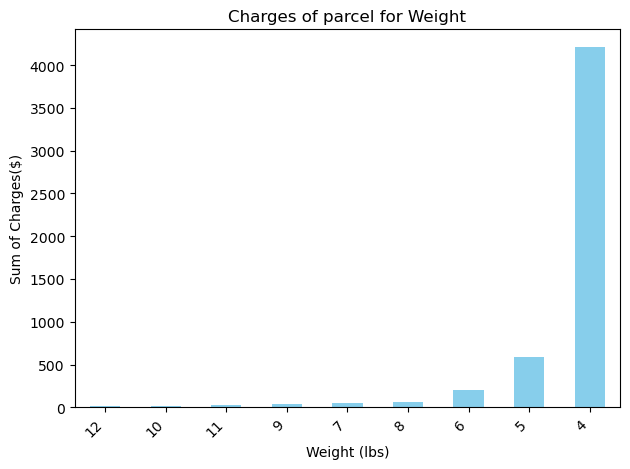

In [357]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = weight_plot.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Weight (lbs)')
plt.ylabel('Sum of Charges($)')
plt.title('Charges of parcel for Weight')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

From the above graph we see that the charges for parcel 4 and parcel 5 are high, Now we will check the charges for service level.

In [358]:
service_plot = df_plot.groupby('Service Level')['Charge ($)'].sum()
service_plot

Service Level
Economy         1089.50
Expedited         25.50
Express         1110.00
Ground          1205.00
Next Day Air      42.50
Priority         581.25
Same day          33.25
Standard        1110.50
Name: Charge ($), dtype: float64

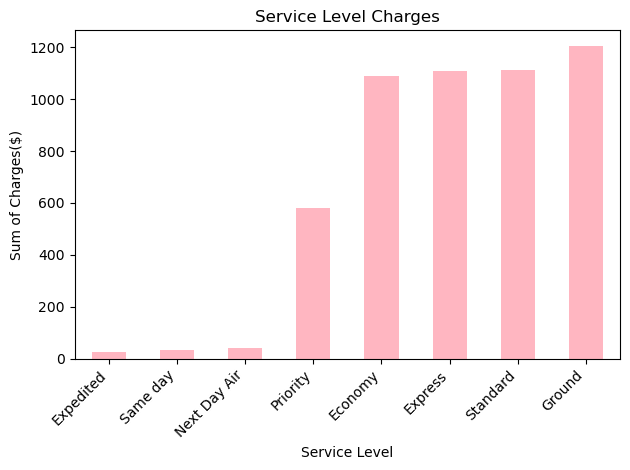

In [359]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = service_plot.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightpink')
plt.xlabel('Service Level')
plt.ylabel('Sum of Charges($)')
plt.title('Service Level Charges')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Top 4 Charges according to the service level are : 'Ground', 'Standard', 'Express', 'Economy'. Below are the counts of service level groupby the carrier name, notice that the count of 'Express is more but still the sum of charges for 'Standard' is greater than 'Express'

In [360]:
carrier_plot = df_plot.groupby('Service Level')['Carrier Name'].count()
carrier_plot

Service Level
Economy         42
Expedited        1
Express         43
Ground          55
Next Day Air     4
Priority        23
Same day         4
Standard        42
Name: Carrier Name, dtype: int64

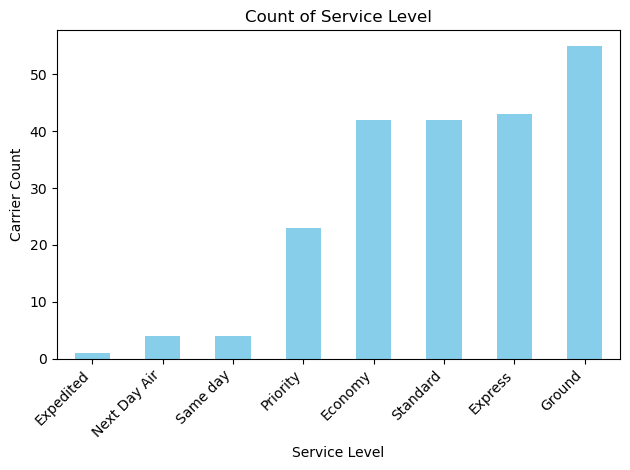

In [361]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = carrier_plot.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Service Level')
plt.ylabel('Carrier Count')
plt.title('Count of Service Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

From the above cells we have noticed that the parcel 4 and 5 are prominent have responsible for most of the carrier services, So we will find some more information regarding parcel 4

In [362]:
parcel_4lbs = df_plot['Weight (lbs)'] == 4

carrier_parcel_4lbs = df_plot[parcel_4lbs].groupby('Carrier Name')['Charge ($)'].sum()
carrier_parcel_4lbs
#parcel4

Carrier Name
BetterTrucks    526.50
DHL             554.50
FedEx           452.50
GLS             452.00
Maergo          429.25
OSM             500.50
OnTrac          515.75
Pandion         501.75
UPS             275.00
Name: Charge ($), dtype: float64

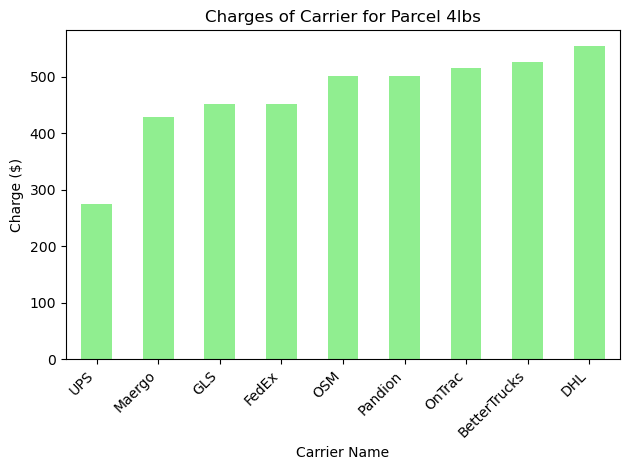

In [363]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = carrier_parcel_4lbs.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightgreen')
plt.xlabel('Carrier Name')
plt.ylabel('Charge ($)')
plt.title('Charges of Carrier for Parcel 4lbs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

we understand from the above graph that parcel 4lbs is the important parcel and have almost use all carrier services, the margins for reducing cost under this section is by knowing which type of services is carrier company providing

In [364]:
# Since DHL has maximum charging numbers so we will check what type of services we are using in DHL 
parcel_4lbs = df_plot['Weight (lbs)'] == 4
service_dhl = df_plot['Carrier Name'] == 'DHL'
service_parcel_4lbs = df_plot[service_dhl].groupby('Service Level')['Charge ($)'].sum()
service_parcel_4lbs

Service Level
Ground           36.00
Next Day Air     11.50
Priority        528.50
Same day          7.25
Name: Charge ($), dtype: float64

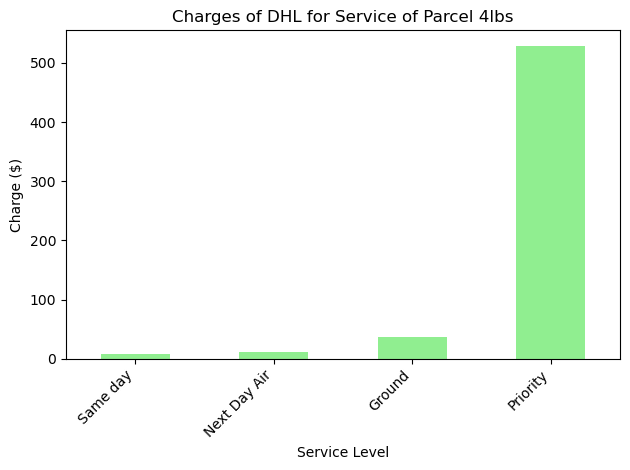

In [372]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = service_parcel_4lbs.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightgreen')
plt.xlabel('Service Level')
plt.ylabel('Charge ($)')
plt.title('Charges of DHL for Service of Parcel 4lbs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

For Parcel 4lbs the DHL is charging mainly for the 'Priority' services. 

In [367]:
#lets check for carrier Bettertrucks services
bettertruck_parcel = df_plot['Weight (lbs)'] == 4
service_bettertrucks = df_plot['Carrier Name'] == 'BetterTrucks'
service_parcel_bettertrucks = df_plot[service_bettertrucks].groupby('Service Level')['Charge ($)'].sum()
service_parcel_bettertrucks

Service Level
Expedited     25.50
Ground         6.25
Priority      26.00
Same day       9.00
Standard     475.00
Name: Charge ($), dtype: float64

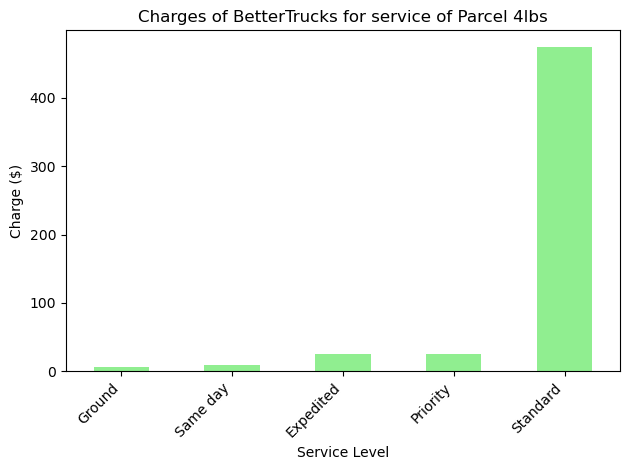

In [371]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = service_parcel_bettertrucks.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightgreen')
plt.xlabel('Service Level')
plt.ylabel('Charge ($)')
plt.title('Charges of BetterTrucks for service of Parcel 4lbs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Bettertrucks services for parcel 4lbs is mainly charging for standard services. In conclusion, we need to focus on reducing our cost for parcel 4lbs for mainly Priorty and Standard services. This can be only done if we deep dive and see the possible reasons for there charge types.

Charges Types category for 'DHL' and 'Betterlucks' services are consist of multiple types top 3 are 'Taxes','Future Day pickup', 'Adjustments' and kinds of surcharge

In [345]:
#lets check for margin of reducing cost for parcel 5lbs
parcel_5lbs = df_plot['Weight (lbs)'] == 5
carrier_parcel_5lbs = df_plot[parcel_5lbs].groupby('Carrier Name')['Charge ($)'].sum()
carrier_parcel_5lbs

Carrier Name
FedEx       95.50
GLS         37.75
Maergo     120.00
Pandion     30.00
UPS        300.00
Name: Charge ($), dtype: float64

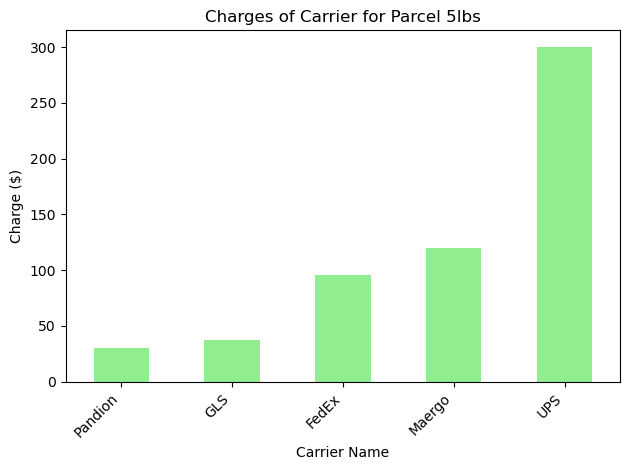

In [291]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = carrier_parcel_5lbs.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightgreen')
plt.xlabel('Carrier Name')
plt.ylabel('Charge ($)')
plt.title('Charges of Carrier for Parcel 5lbs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We see that Carrier 'UPS' cost is maximum, now we will check the reason why they are charging this much amount

In [373]:
parcel_5lbs = df_plot['Weight (lbs)'] == 5
service_UPS = df_plot['Carrier Name'] == 'UPS'
service_parcel_ups = df_plot[service_UPS].groupby('Service Level')['Charge ($)'].sum()
service_parcel_ups

Service Level
Express          35.00
Ground           30.75
Next Day Air     10.00
Standard        575.00
Name: Charge ($), dtype: float64

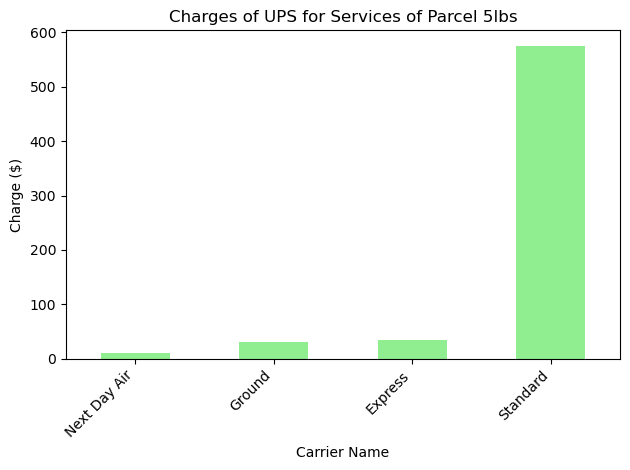

In [375]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = service_parcel_ups.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightgreen')
plt.xlabel('Carrier Name')
plt.ylabel('Charge ($)')
plt.title('Charges of UPS for Services of Parcel 5lbs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [376]:
parcel_5 = df_plot['Weight (lbs)'] == 5
service_Maergo = df_plot['Carrier Name'] == 'Maergo'
service_parcel_maergo = df_plot[service_Maergo].groupby('Service Level')['Charge ($)'].sum()
service_parcel_maergo

Service Level
Economy    520.00
Ground      29.25
Name: Charge ($), dtype: float64

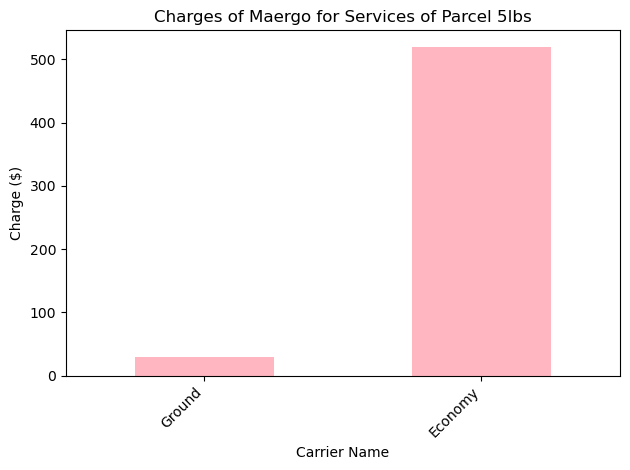

In [378]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = service_parcel_maergo.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightpink')
plt.xlabel('Carrier Name')
plt.ylabel('Charge ($)')
plt.title('Charges of Maergo for Services of Parcel 5lbs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We observed that for the parcel of 5lbs the Carrier 'UPS' and 'Maergo' showing maximum charges for 'Standard' and 'Economy' services. If we want to reduce the cost of parcel we need to check the reasons behind the charge type for these two services.

After Checking the Charge types for these two serivces are mainly from 'Future Day Pickups- Special Handling Charges"